In [9]:
%matplotlib inline

import csv
import json
import numpy as np
import pandas as pd
import datetime
import os.path
import matplotlib.image
import matplotlib.pyplot as plt

In [2]:
def readFile(filename):
    f = open(filename, 'r')
    js = json.loads(f.read())
    f.close()
    return js

In [3]:
dates = pd.Series(pd.date_range('2016-04-01', '2016-05-20')).apply(lambda x: x.strftime('%Y%m%d'))

user_step_count = []

In [4]:
prefix = 'A0'
full_path = './sokulee/' + prefix

for user_num in range(1,100):
    directory_num = full_path + str(user_num) + '/'
    if os.path.isdir(directory_num):
        total_count = 0
        user = prefix + str(user_num)
        
        for date in dates:
            current_path = directory_num + user + '_' + date + '_steps.json'
            
            if os.path.exists(current_path):
                csv_data = readFile(current_path)
                try:
                    total_count = total_count + int(csv_data["activities-steps"][0]["value"])
                except KeyError:
                    pass
        
        user_step_count.append((user, total_count))

In [5]:
df = pd.DataFrame(user_step_count)
df.columns = ['user_number', 'total_step']
df = df.drop_duplicates(subset=['user_number'])
result = df.sort_values(by=['total_step'], ascending=False)[0:10]
result

,user_number,total_step
17,A025,1083320
18,A026,1070291
35,A043,974336
37,A045,835907
51,A062,816567
44,A054,810861
60,A083,802587
12,A019,802587
11,A018,800509
30,A038,775284


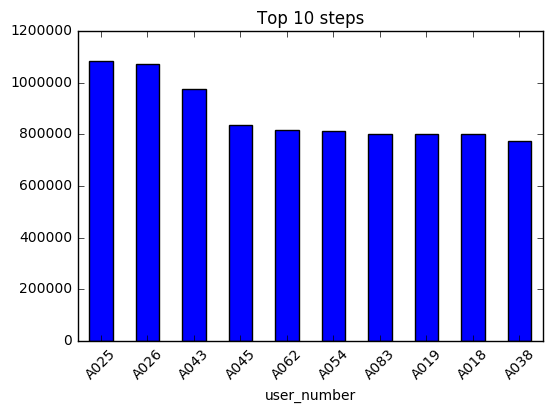

In [28]:
result.plot(kind='bar', x='user_number', rot=45, legend=False);
plt.title('Top 10 steps')
plt.show()